In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression as LRC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
sns.set_style('darkgrid')
filterwarnings('ignore')

In [3]:
# https://www.kaggle.com/datasets/sanamps/personal-loan-customers

* ID: ID of the bank customer
* Age: Age of the customer
* Experience: Number of Years of Professional Experience
* Income: Annual Income of the customer (in 1000$)
* ZIP Code: ZIP code related with the home address of the customer.
* Family: Family Size of the Customer (Including Husband/Wife and Children)
* CCAvg: Average spending on credit cards per month (in 1000$)
* Education Level: {1: Undergrad; 2: Graduate; 3: Advanced/Professional}
* Mortgage: Value of house mortgage if there are any (in 1000$)
* Securities Account: Does the customer have a securities account with the bank? {1: Yes, 0: No}
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank? {1: Yes, 0: No}
* Online: Does the customer use internet banking facilities? {1: Yes, 0: No}
* CreditCard: Does the customer use a credit card issued by this Bank? {1: Yes, 0: No}
* Personal Loan (Label): Did this customer accept the personal loan offered in the last campaign? {1: Yes, 0: No}

In [4]:
df = pd.read_csv('Loan_Modelling.csv', index_col = 'ID')
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
target_col = 'Personal_Loan'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [6]:
# All are numeric
# No missing data

In [7]:
for col in df.columns:
    print(col, df[col].nunique())
    print(df[col].value_counts())
    print('-'*20)

Age 45
Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64
--------------------
Experience 47
Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1   

In [8]:
num_cols = ['Age','Experience','Income','CCAvg','Mortgage']
cat_cols = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard']
drop_cols = ['ZIPCode']
target_col = 'Personal_Loan'

# Univariate Analysis

Age


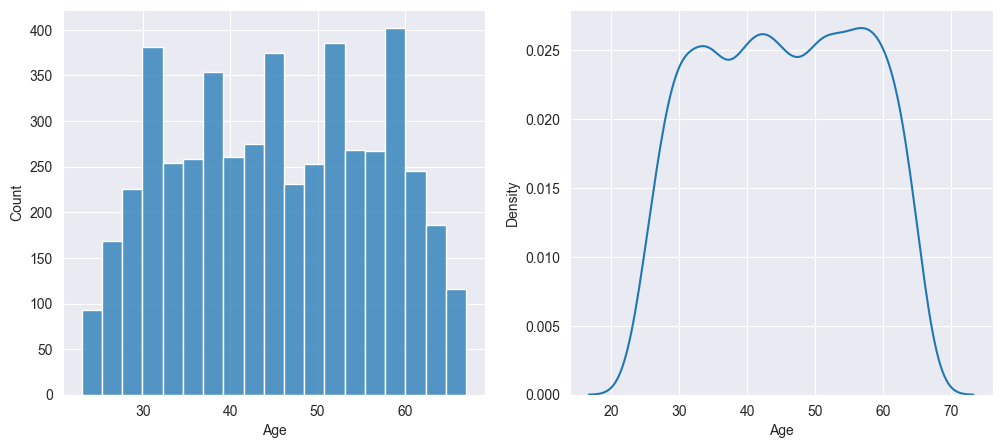

Experience


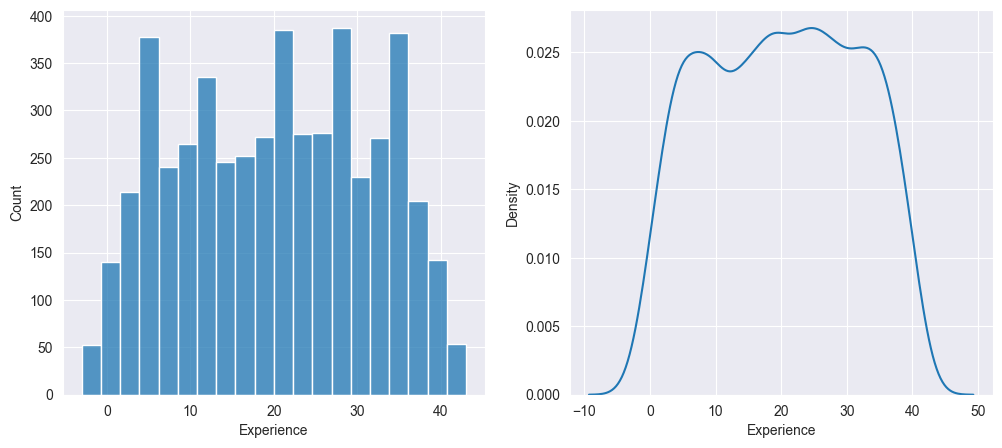

Income


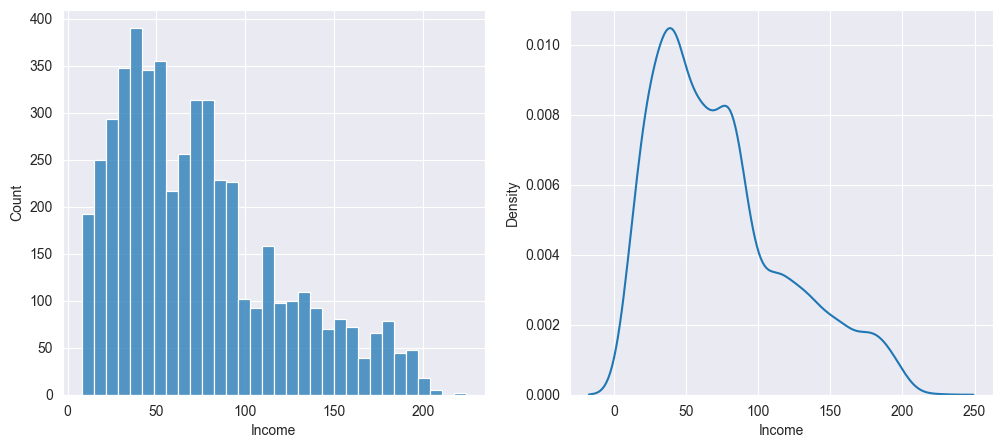

CCAvg


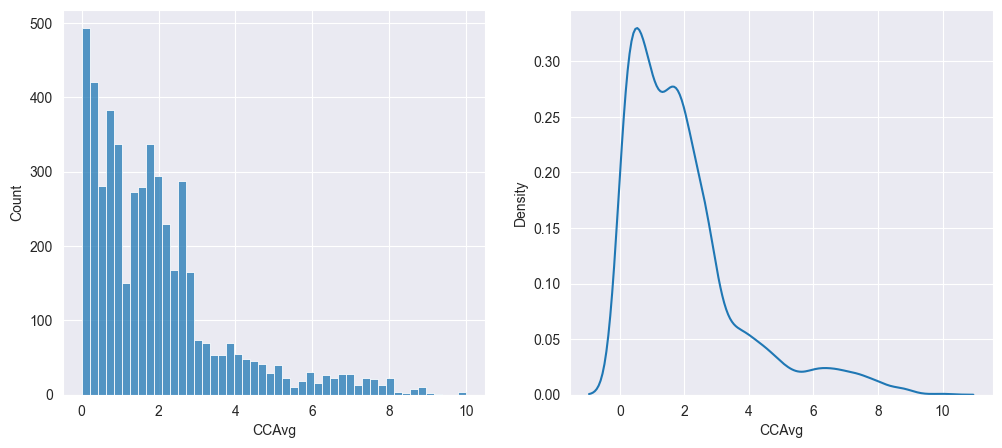

Mortgage


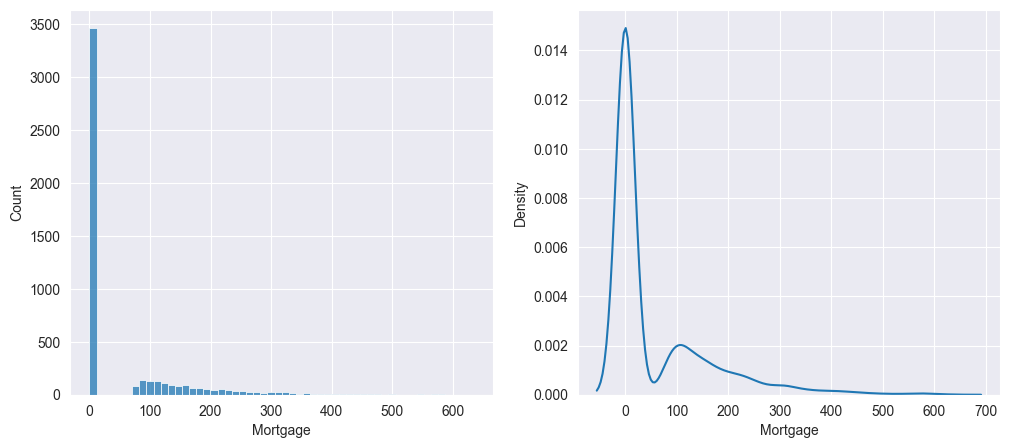

In [9]:
# Continuous Numerical Data
for col in num_cols:
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = col)
    plt.subplot(1,2,2)
    sns.kdeplot(data = df, x = col)
    plt.show()

Family


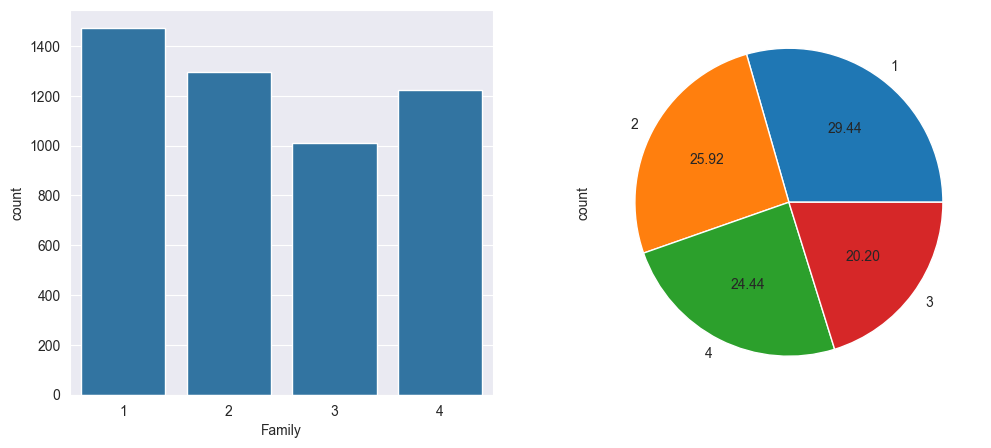

Education


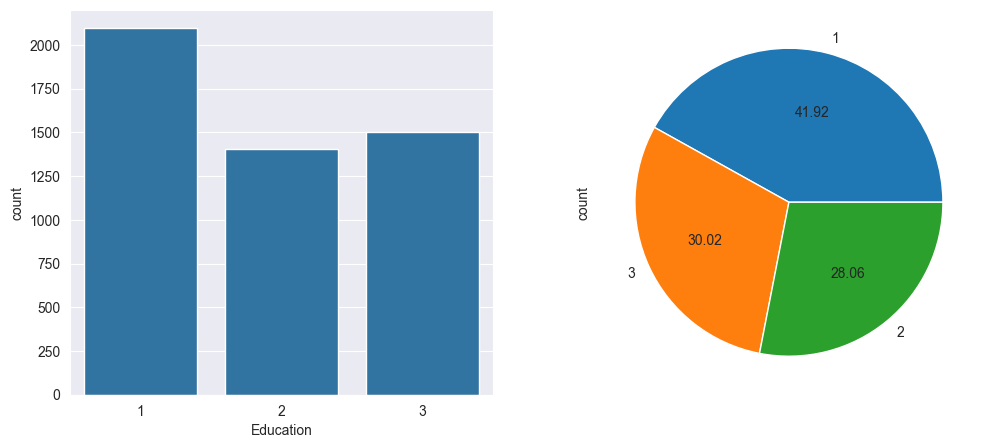

Securities_Account


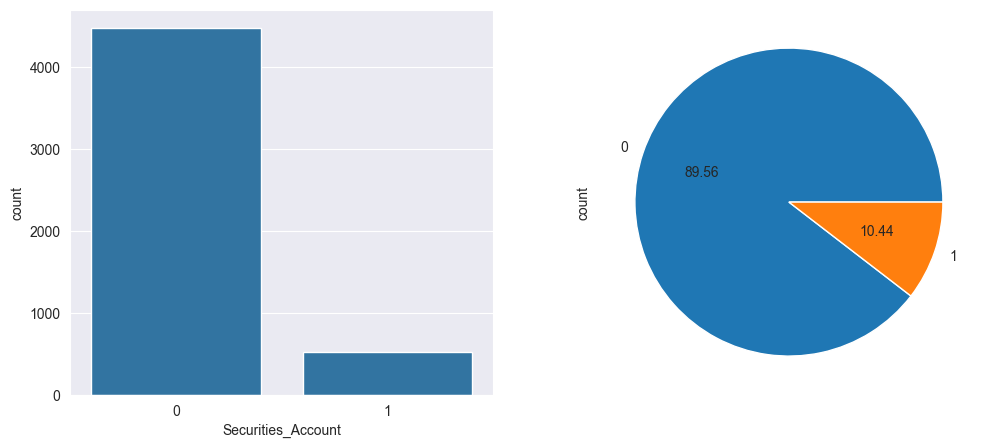

CD_Account


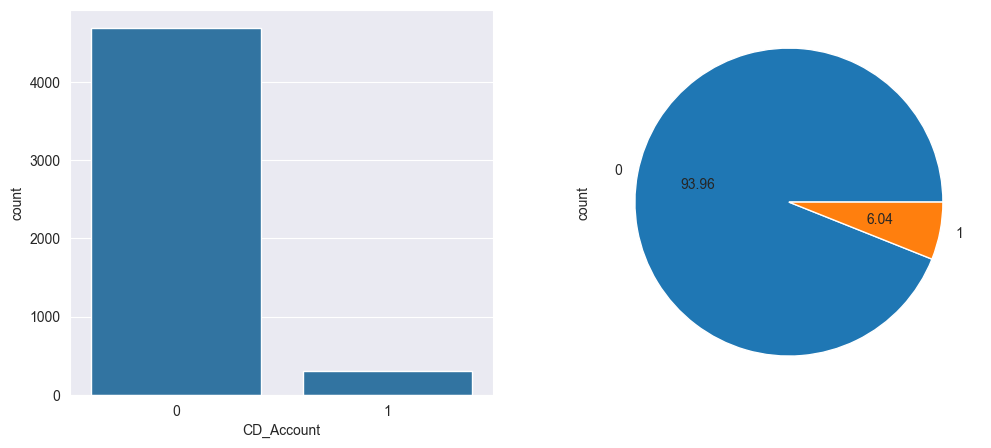

Online


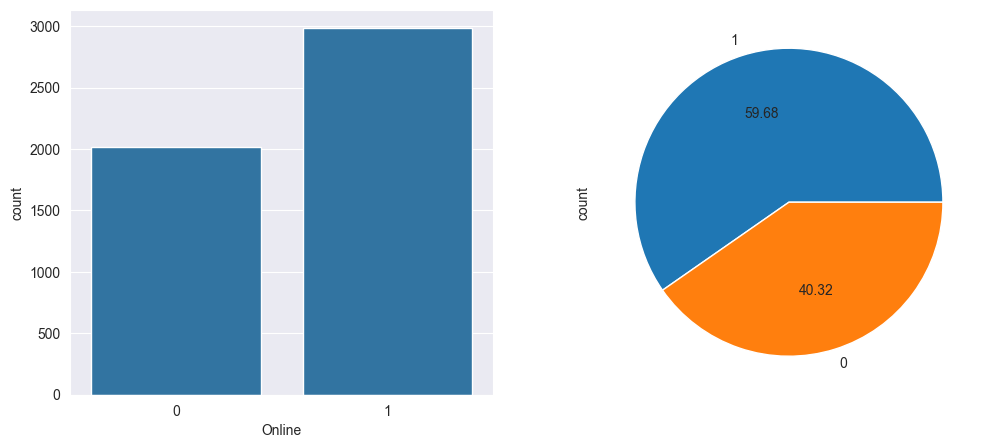

CreditCard


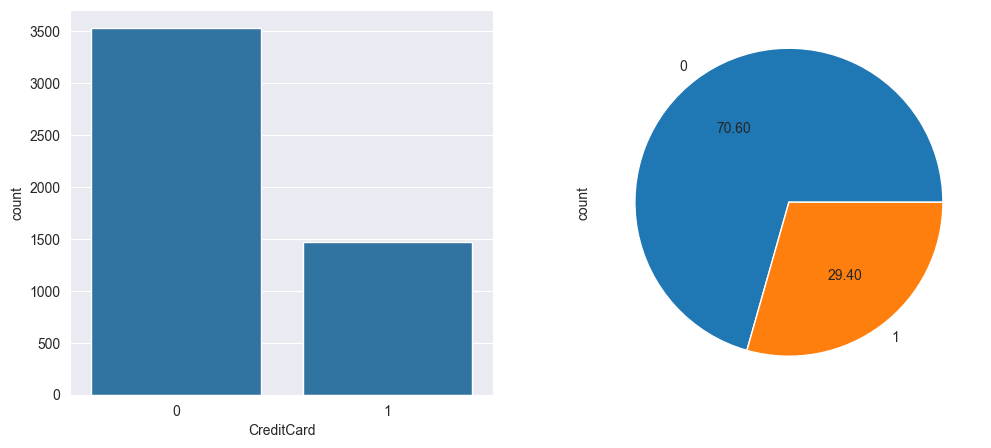

Personal_Loan


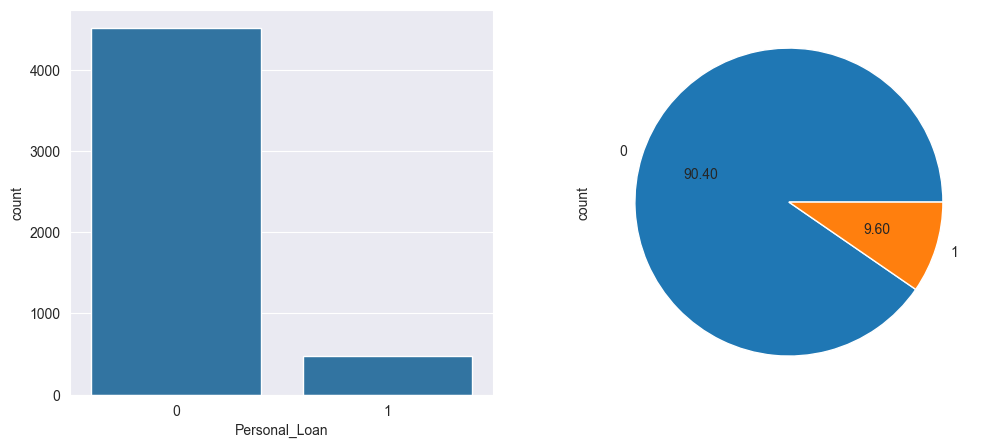

In [33]:
# Discrete/Categorical Numerical Data
for col in cat_cols+[target_col]:
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = col)
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie(autopct='%0.2f')
    plt.show()

# Bivariate Analysis

Age


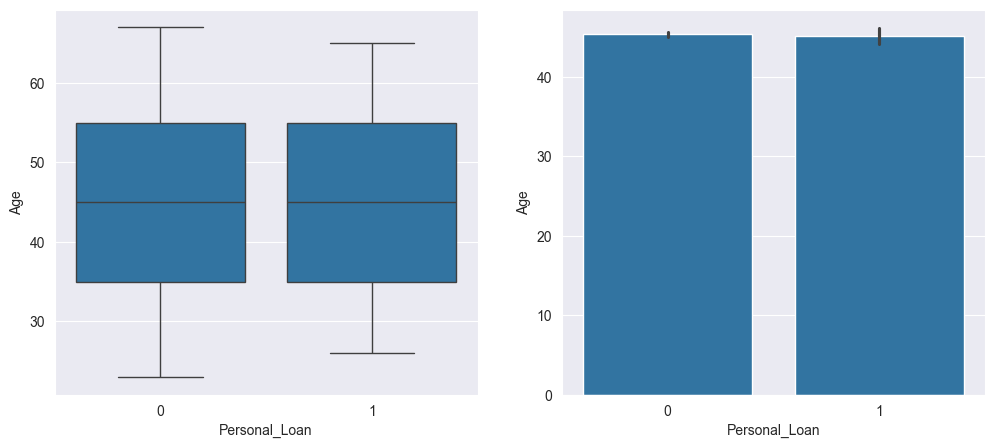

Experience


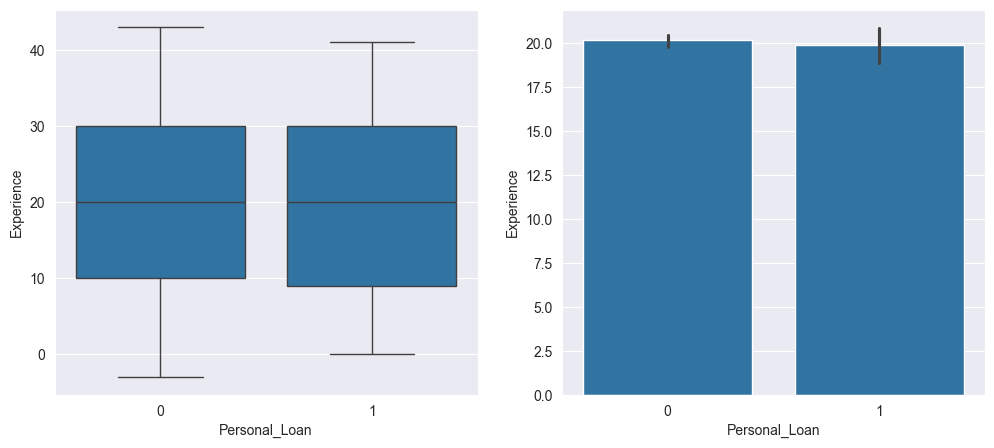

Income


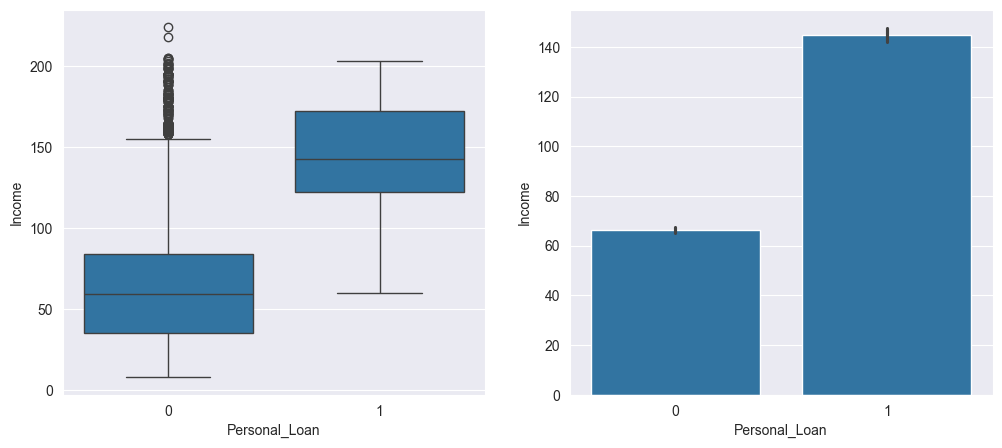

CCAvg


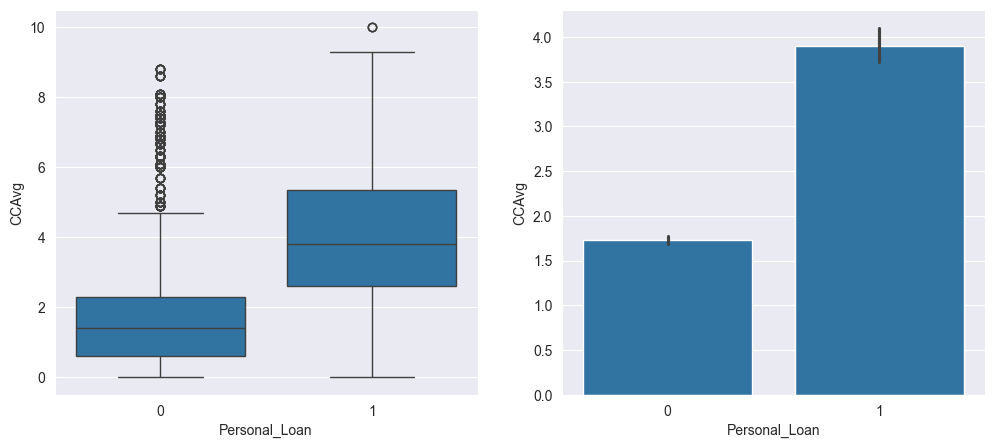

Mortgage


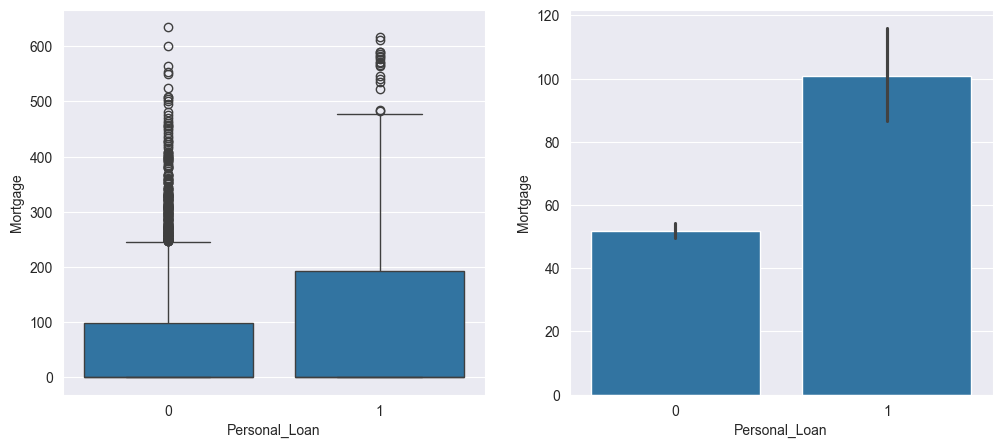

In [10]:
for col in num_cols:
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.boxplot(data = df, x = target_col, y = col)
    plt.subplot(1,2,2)
    sns.barplot(data = df, x = target_col, y = col)
    plt.show()

In [11]:
# Summary
# - Age, Experience are not acting as a feature to Personal Loan
# - Mortgage, Income, CCAvg looks like a feature

In [12]:
# 1 Family Member - Loan Taken
print(100 * 2.14/(2.14+27.3))

# 2 Family Member - Loan Taken
print(100 * 2.12/(2.12+23.8))

# 3 Family Member - Loan Taken
print(100 * 2.66/(2.66+17.54))

# 4 Family Member - Loan Taken
print(100 * 2.68/(2.68+21.76))

7.269021739130435
8.179012345679011
13.16831683168317
10.965630114566284


In [13]:
100*4/30

13.333333333333334

Family


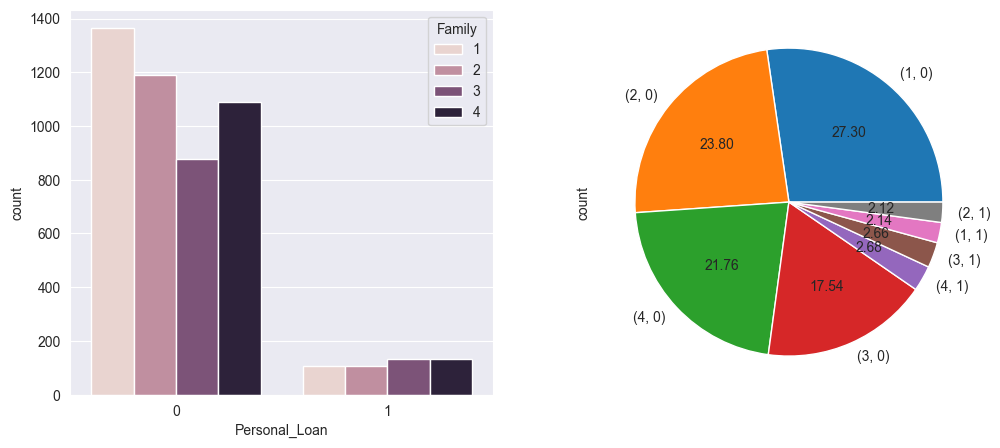

Education


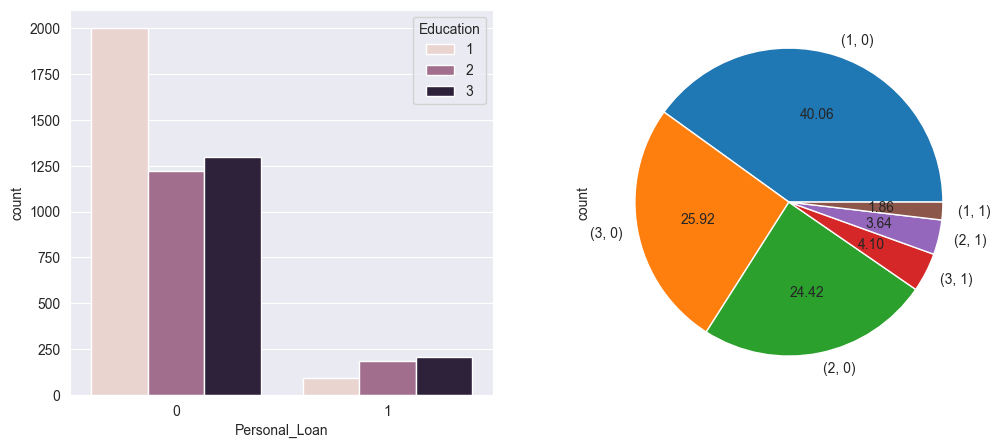

Securities_Account


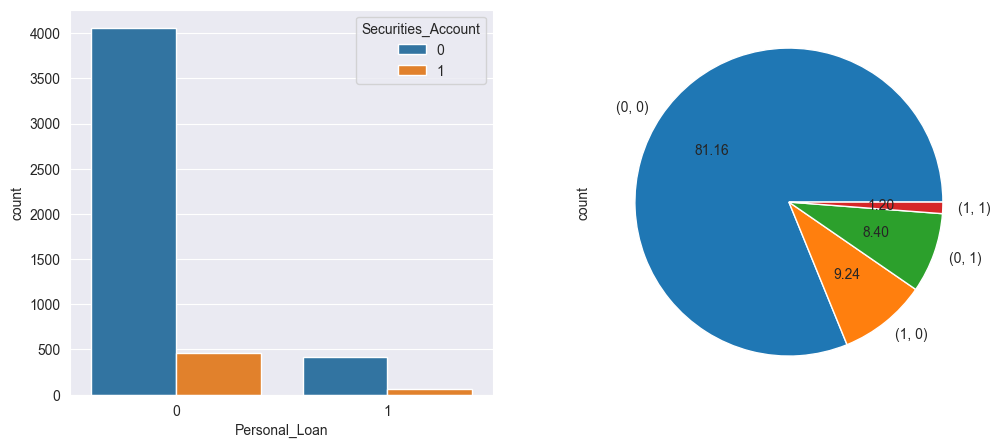

CD_Account


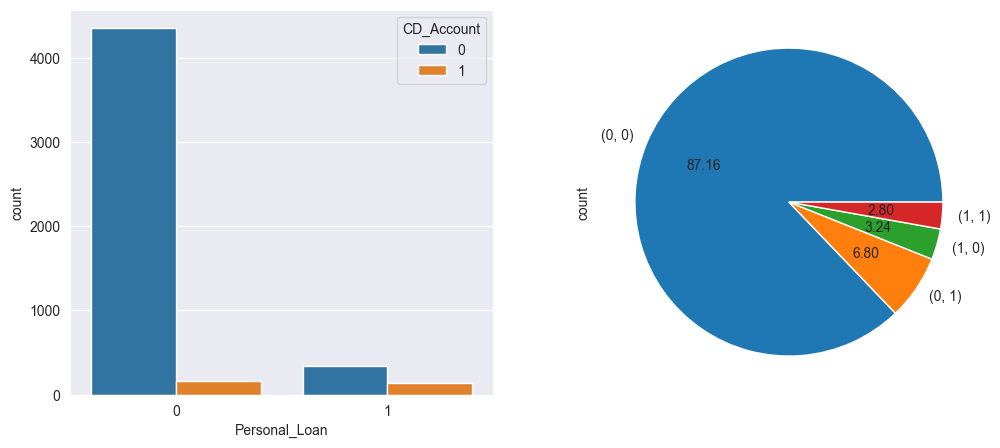

Online


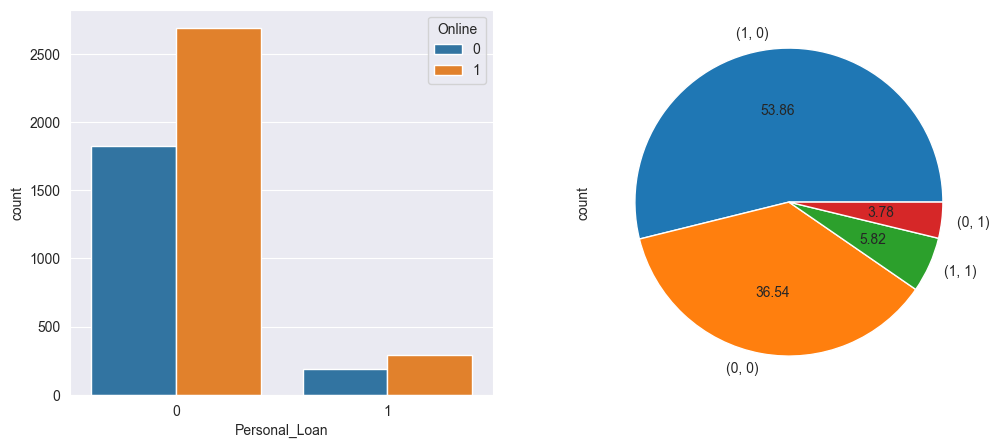

CreditCard


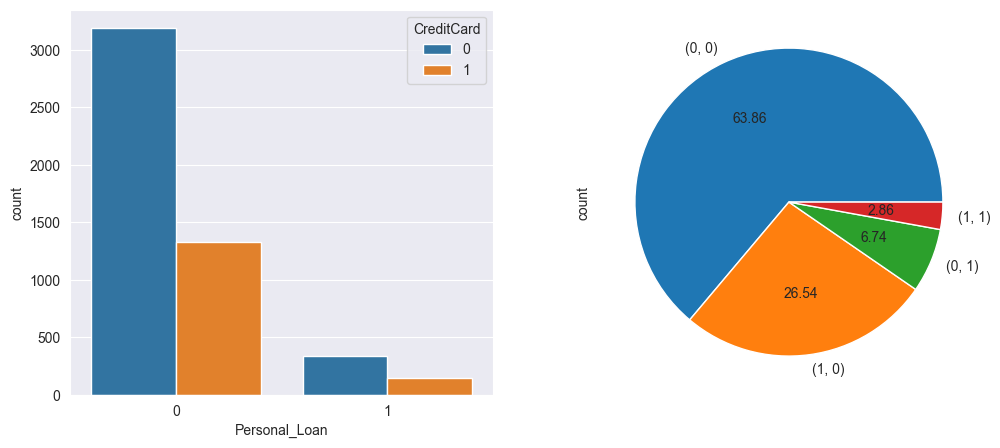

In [14]:
for col in cat_cols:
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = target_col, hue = col)
    plt.subplot(1,2,2)
    df[[col,target_col]].value_counts().plot.pie(autopct='%0.2f', subplots=True)
    plt.show()

In [15]:
# Summary
# - Family, Education, CD_Account, CreditCard looks like some features
# - Securities_Account, Online shows less/no impact on target

# Multivariate Analysis

<AxesSubplot: >

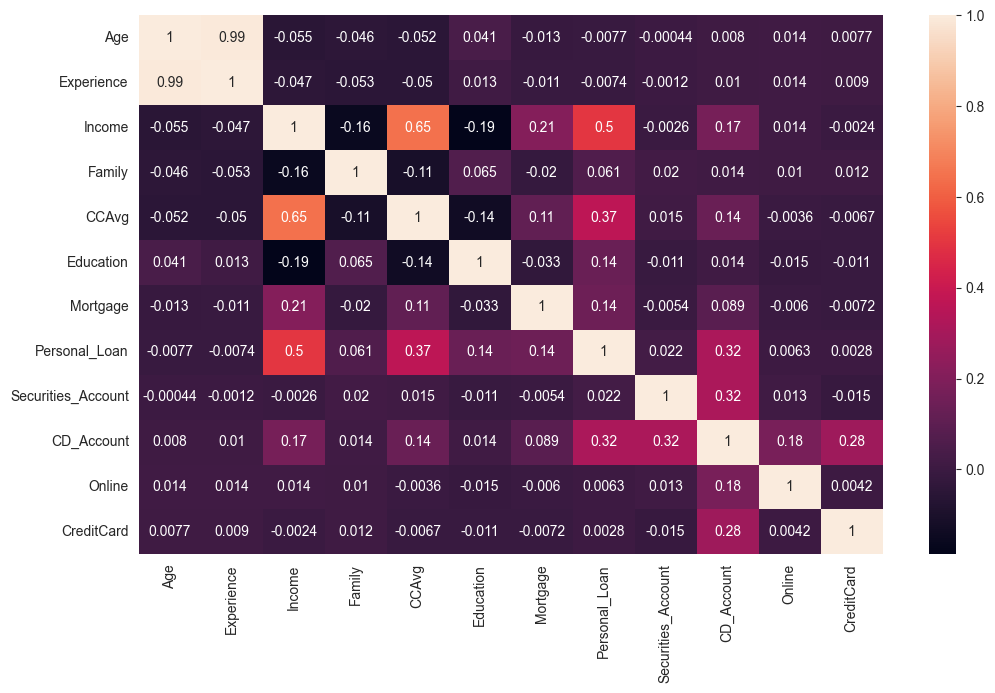

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(df.drop(drop_cols, axis=1).corr(), annot=True)

In [17]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [18]:
feature_cols = ['Income','Family', 'CCAvg','Education', 'Mortgage','CD_Account','CreditCard']
features = df[feature_cols]
target = df[target_col]

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, train_size=0.75, random_state=101)

In [20]:
xtrain.shape

(3750, 7)

In [21]:
xtest.shape

(1250, 7)

In [22]:
def model_create(algo, ):
    print(algo)
    model = algo().fit(xtrain,ytrain)
    score = round(model.score(xtest, ytest) * 100, 2)
    print('Test Score:', score)
    print('')
    ypred = model.predict(xtest)
    sns.heatmap(pd.DataFrame(confusion_matrix(ytest, ypred)),annot=True, fmt='d')
    plt.show()
    print(classification_report(ytest,ypred))
    print('-'*20)
    return model

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Test Score: 94.64



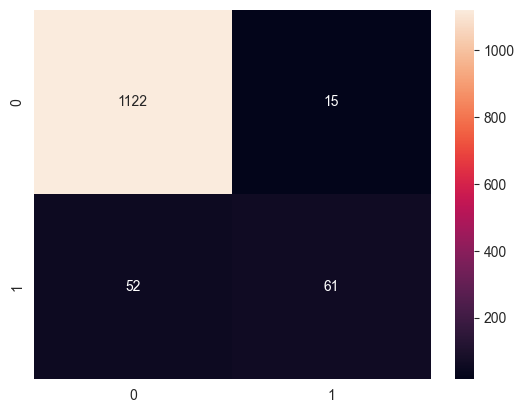

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.80      0.54      0.65       113

    accuracy                           0.95      1250
   macro avg       0.88      0.76      0.81      1250
weighted avg       0.94      0.95      0.94      1250

--------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Test Score: 98.24



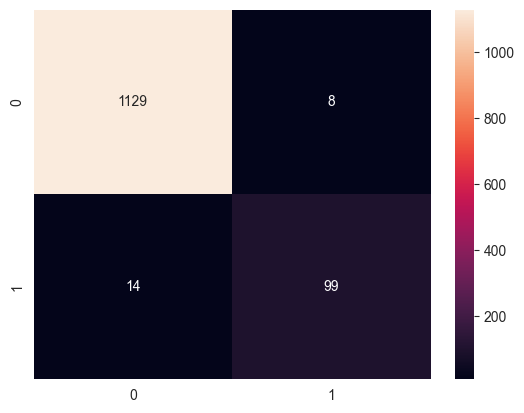

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.93      0.88      0.90       113

    accuracy                           0.98      1250
   macro avg       0.96      0.93      0.95      1250
weighted avg       0.98      0.98      0.98      1250

--------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test Score: 98.64



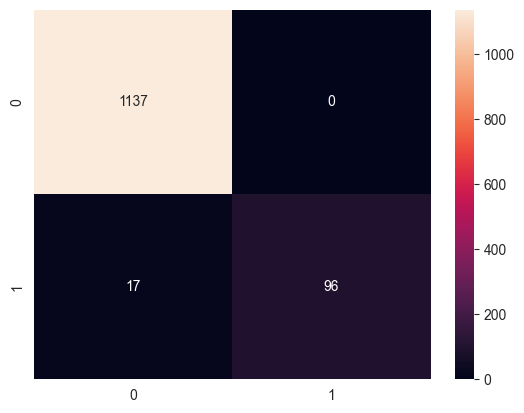

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       1.00      0.85      0.92       113

    accuracy                           0.99      1250
   macro avg       0.99      0.92      0.96      1250
weighted avg       0.99      0.99      0.99      1250

--------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Test Score: 93.28



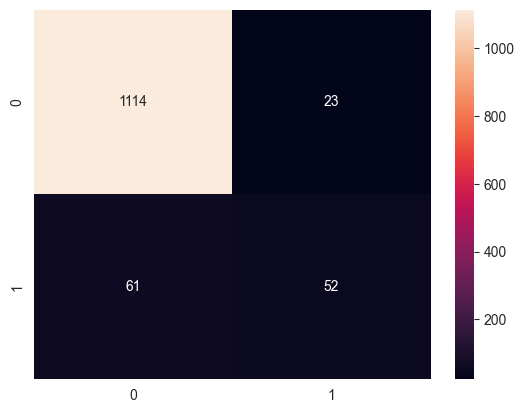

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1137
           1       0.69      0.46      0.55       113

    accuracy                           0.93      1250
   macro avg       0.82      0.72      0.76      1250
weighted avg       0.93      0.93      0.93      1250

--------------------
<class 'sklearn.svm._classes.SVC'>
Test Score: 91.28



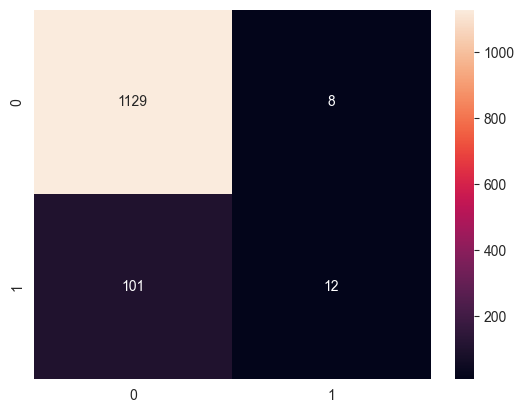

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1137
           1       0.60      0.11      0.18       113

    accuracy                           0.91      1250
   macro avg       0.76      0.55      0.57      1250
weighted avg       0.89      0.91      0.88      1250

--------------------


In [23]:
model_log = model_create(LRC)
model_dtc = model_create(DTC)
model_rfc = model_create(RFC)
model_knc = model_create(KNC)
model_svc = model_create(SVC)

In [24]:
def model_gs_create(algo, parameters):
    print(algo)
    model_gs = GridSearchCV(algo(), param_grid=parameters).fit(xtrain,ytrain)
    model = model_gs.best_estimator_
    score = round(model.score(xtest, ytest) * 100, 2)
    print('Test Score:', score)
    print('')
    ypred = model.predict(xtest)
    sns.heatmap(pd.DataFrame(confusion_matrix(ytest, ypred)),annot=True, fmt='d')
    plt.show()
    print(classification_report(ytest,ypred))
    print('-'*20)
    return model

In [25]:
params_log = {
    'penalty':[None,'l1', 'l2', 'elasticnet'],
    'tol':[0.0001,0.001,0.01,0.1,1.0,10.0],
    'C':[0.0001,0.001,0.01,0.1,1.0,10.0],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}
params_dt = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,5,10,15],
}
params_rf = {
    'n_estimators':[10,50,100,150,200],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,5,10,15],
}
params_svc = {
    'kernel':['linear', 'poly', 'rbf'],
    'gamma':[0.0001,0.001,0.01,0.1,1.0],
    'C':[0.01,0.1,1.0,10.0,100.0],
}
params_knn = {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Test Score: 94.64



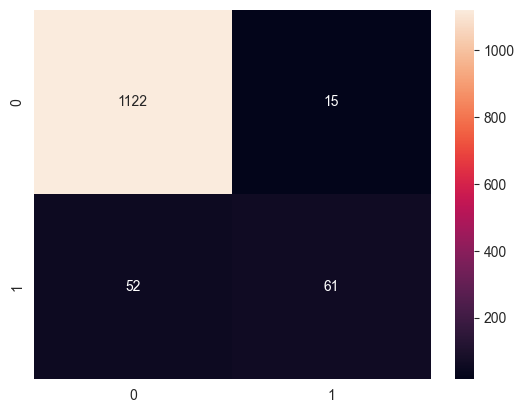

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.80      0.54      0.65       113

    accuracy                           0.95      1250
   macro avg       0.88      0.76      0.81      1250
weighted avg       0.94      0.95      0.94      1250

--------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Test Score: 98.24



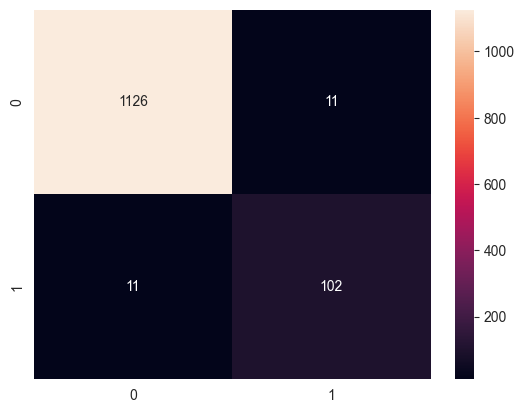

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.90      0.90      0.90       113

    accuracy                           0.98      1250
   macro avg       0.95      0.95      0.95      1250
weighted avg       0.98      0.98      0.98      1250

--------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test Score: 98.64



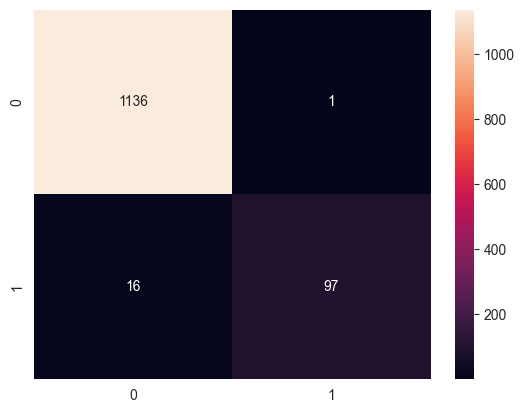

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       0.99      0.86      0.92       113

    accuracy                           0.99      1250
   macro avg       0.99      0.93      0.96      1250
weighted avg       0.99      0.99      0.99      1250

--------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Test Score: 92.8



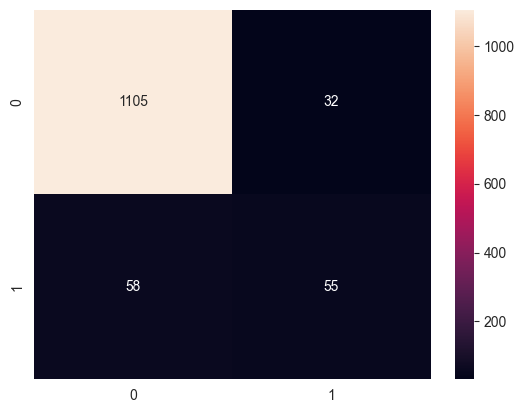

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1137
           1       0.63      0.49      0.55       113

    accuracy                           0.93      1250
   macro avg       0.79      0.73      0.76      1250
weighted avg       0.92      0.93      0.92      1250

--------------------


In [26]:
model_glog = model_gs_create(LRC, params_log)
model_gdtc = model_gs_create(DTC, params_dt)
model_grfc = model_gs_create(RFC, params_rf)
model_gknc = model_gs_create(KNC, params_knn)
#model_gsvc = model_gs_create(SVC, params_svc)

In [27]:
model_rfc.feature_importances_

array([0.35390175, 0.10234214, 0.20877807, 0.21023504, 0.04743727,
       0.06666863, 0.01063709])

In [28]:
model_rfc.feature_names_in_

array(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD_Account',
       'CreditCard'], dtype=object)

In [29]:
# Post-Prunning

In [30]:
fi = pd.DataFrame(
    model_rfc.feature_importances_.tolist(),
    index=model_rfc.feature_names_in_,
    columns=['Feature Importance']
)
fi

,Feature Importance
Income,0.353902
Family,0.102342
CCAvg,0.208778
Education,0.210235
Mortgage,0.047437
CD_Account,0.066669
CreditCard,0.010637


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test Score: 98.48



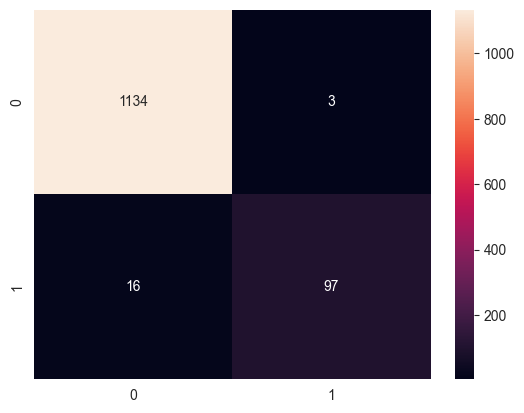

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       0.97      0.86      0.91       113

    accuracy                           0.98      1250
   macro avg       0.98      0.93      0.95      1250
weighted avg       0.98      0.98      0.98      1250

--------------------


In [ ]:
feature_cols = ['Income','Family', 'CCAvg','Education', 'Mortgage','CD_Account']
features = df[feature_cols]
target = df[target_col]
xtrain, xtest, ytrain, ytest = train_test_split(features, target, train_size=0.75, random_state=101)
model_rfc_2 = model_create(RFC)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test Score: 98.56



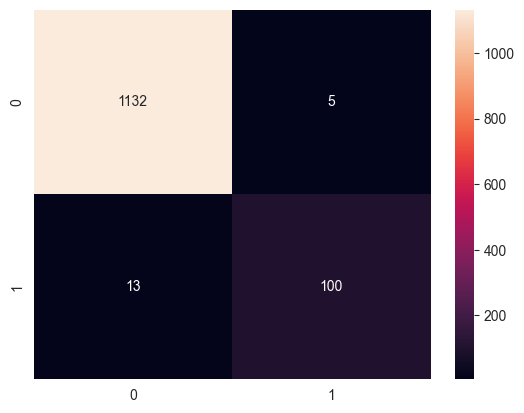

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       0.95      0.88      0.92       113

    accuracy                           0.99      1250
   macro avg       0.97      0.94      0.95      1250
weighted avg       0.99      0.99      0.99      1250

--------------------


In [31]:
feature_cols = ['Income','Family', 'CCAvg','Education']
features = df[feature_cols]
target = df[target_col]
xtrain, xtest, ytrain, ytest = train_test_split(features, target, train_size=0.75, random_state=101)
model_rfc_3 = model_create(RFC)

In [32]:
pd.to_pickle(model_rfc_3, 'loan_model.pickle')